IMporting libraries

In [ ]:
import numpy as np
import pandas as pd
import warnings
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
sm=SMOTE(random_state=2)
smk = SMOTETomek(random_state= 2)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [160]:
df=pd.read_excel('parkinsons.xlsx')
df.head()

,id,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,1,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,2,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,3,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,4,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,5,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [161]:
df = df.drop(['name'],axis = 1)
df.id = df.id.astype('int')

Checking missing values

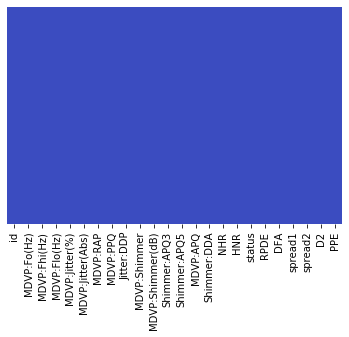

In [162]:
sns.heatmap(df.isnull(),cmap='coolwarm',xticklabels = True,yticklabels = False,cbar=False)

In [163]:
y = df['status']
X = df.drop(['status'],axis =1 )

In [164]:
X.head()

,id,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Feature Selection

In [165]:
bestfeatures = SelectKBest(score_func = f_classif , k = 23)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(30,'Score'))

               Specs      Score
19           spread1  90.424219
22               PPE  75.803195
20           spread2  50.343165
1        MDVP:Fo(Hz)  33.286577
3       MDVP:Flo(Hz)  32.612875
9       MDVP:Shimmer  30.122600
13          MDVP:APQ  29.536350
16               HNR  29.015927
12      Shimmer:APQ5  27.145033
10  MDVP:Shimmer(dB)  27.065484
11      Shimmer:APQ3  26.527120
14       Shimmer:DDA  26.525626
21                D2  25.265912
5   MDVP:Jitter(Abs)  25.001729
17              RPDE  20.310049
7           MDVP:PPQ  17.548533
4     MDVP:Jitter(%)  16.192809
6           MDVP:RAP  14.775226
8         Jitter:DDP  14.772666
18               DFA  10.952901
15               NHR   7.183270
0                 id   5.570972
2       MDVP:Fhi(Hz)   5.478255


Splitting into test and train

In [166]:
X_train,X_test,y_train, y_test = train_test_split( X, y ,test_size = 0.3 , random_state = 123)

In [167]:
X_test.head()

,id,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
136,137,113.400,133.344,107.816,0.00451,0.00004,0.00219,0.00283,0.00658,0.04879,...,0.04370,0.07154,0.02278,19.013,0.647900,0.708144,-4.378916,0.300067,2.445502,0.259451
4,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
81,82,95.605,107.715,87.549,0.00702,0.00007,0.00428,0.00371,0.01283,0.03156,...,0.02190,0.05377,0.01825,19.659,0.576084,0.778747,-5.132032,0.210458,2.232576,0.260633
180,181,150.440,163.441,144.736,0.00396,0.00003,0.00206,0.00233,0.00619,0.02551,...,0.02148,0.03964,0.00611,23.133,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
160,161,114.238,124.393,77.022,0.00581,0.00005,0.00299,0.00316,0.00896,0.04009,...,0.04114,0.04736,0.02073,20.437,0.653139,0.694571,-5.185987,0.259229,2.151121,0.244948


Balancing data

In [168]:
def balancing(X_train,y_train) :
    #Smote
    if( x ==1):
        #X_train, y_train = sm.fit_sample(X_train, y_train.values.ravel())
        X_train, y_train = sm.fit_sample(X_train, y_train)
        
    #smotetomek
    elif(x ==2) :
        X_train, y_train = smk.fit_sample(X_train, y_train.values.ravel())
    else :
        print('wrong input')
    y_train = pd.DataFrame(y_train)
    X_train = pd.DataFrame(X_train)

    X_train = X_train.round(2)
    #print(X_train.head())
    return X_train,y_train

In [169]:
x = 1
X_train,y_train = balancing(X_train,y_train)

In [170]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,115.0,206.33,226.36,92.02,0.00,0.0,0.00,0.00,0.01,0.02,...,0.02,0.03,0.01,21.86,0.33,0.72,-6.73,0.18,2.94,0.12
1,96.0,157.45,163.27,149.60,0.00,0.0,0.00,0.00,0.01,0.03,...,0.03,0.05,0.01,21.69,0.45,0.71,-6.25,0.18,2.34,0.16
2,148.0,183.52,216.81,161.34,0.01,0.0,0.01,0.01,0.03,0.06,...,0.06,0.09,0.06,14.37,0.48,0.77,-4.28,0.36,3.14,0.34
3,53.0,128.00,138.05,122.08,0.00,0.0,0.00,0.00,0.00,0.02,...,0.02,0.04,0.00,24.69,0.46,0.77,-7.07,0.22,1.97,0.12
4,25.0,163.66,200.84,76.78,0.01,0.0,0.00,0.00,0.01,0.02,...,0.01,0.02,0.02,23.83,0.40,0.73,-5.56,0.22,2.69,0.22


In [171]:

    X_train = X_train.rename(columns={0:'id',1:'MDVP:Fo(Hz)',2:'MDVP:Fhi(Hz)',3:'MDVP:Flo(Hz)',4:'MDVP:Jitter(%)',5
                       :'MDVP:Jitter(Abs)',6:'MDVP:RAP',7:'MDVP:PPQ',8:'Jitter:DDP',9:'MDVP:Shimmer',
                                      10:'MDVP:Shimmer(dB)',11:'Shimmer:APQ3',12:'Shimmer:APQ5',
                                      13:'MDVP:APQ',14:'Shimmer:DDA',15:'NHR',16:'HNR',
                                      17:'RPDE',18:'DFA',19:'spread1',20:'spread2',21:
                                     'D2', 22:'PPE'})
    y_train = y_train.rename(columns={0:'status'})

In [172]:
y_train['status'].value_counts()

1    104
0    104
Name: status, dtype: int64

Standardizing data set

In [173]:
sc_X = StandardScaler()

In [174]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

Applying machine learning algorithms

In [175]:
svc_model = SVC(class_weight ='balanced',probability = True)

In [ ]:
svc_model.fit(X_train,y_train)

In [177]:
svc_predictions = svc_model.predict(X_test)

In [178]:
print(accuracy_score(y_test,svc_predictions))

0.847457627118644


In [ ]:
svc_score = cross_val_score(estimator = svc_model , X = X_train , y = y_train,cv = 5)


In [180]:
print(svc_score.mean())

0.894047619047619


In [181]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train,y_train)

In [183]:
nb_predictions = nb.predict(X_test)

In [184]:
print(accuracy_score(y_test,nb_predictions))

0.6101694915254238


In [185]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

In [187]:
logreg_predictions = logreg.predict(X_test)

In [188]:
print(accuracy_score(y_test,logreg_predictions))

0.7966101694915254


In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
rfc = RandomForestClassifier(n_estimators =10 )

In [ ]:
rfc.fit(X_train,y_train)

In [194]:
rfc_predictions = rfc.predict(X_test)

In [196]:
print(accuracy_score(y_test,rfc_predictions))

0.9152542372881356


In [ ]:
rfc_score = cross_val_score(estimator = rfc , X = X_train , y = y_train,cv =5)


In [198]:
print(rfc_score.mean())

0.9376190476190477


In [199]:
import xgboost as xgb

In [200]:
model = xgb.XGBClassifier()

In [ ]:
model.fit(X_train,y_train)

In [202]:
predictions = model.predict(X_test)

In [203]:
print(accuracy_score(y_test,predictions))

0.9661016949152542


In [205]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.95      0.98        43

    accuracy                           0.97        59
   macro avg       0.94      0.98      0.96        59
weighted avg       0.97      0.97      0.97        59

[[16  0]
 [ 2 41]]


In [ ]:
score = cross_val_score(estimator = model , X = X_train , y = y_train,cv =5)


In [208]:
print(score)

[0.9047619  0.92857143 0.97619048 0.9047619  0.975     ]
